In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rng = np.random.default_rng()

In [3]:
def linear_kernel(t, tp, sigma=1, c=0, sigma_c=1):
    return sigma_c**2 + sigma**2*(t-c)*(tp-c)

def squared_exponential_kernel(t, tp, sigma=1, l=1):
    return sigma**2*np.exp(-(t-tp)**2/(2*l**2))

In [4]:
N = 250
x = np.linspace(-5, 5, N)

In [5]:
Sigma = np.zeros((N, N))

for i, t in enumerate(x):
    for j, tp in enumerate(x):
        Sigma[i, j] = linear_kernel(t, tp, sigma=1, c=0, sigma_c=1)

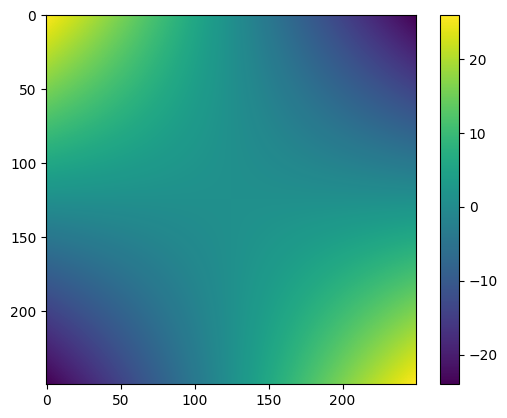

In [6]:
fig, ax = plt.subplots()
ax.set_aspect('equal')

ax.imshow(Sigma)
cbar = ax.figure.colorbar(ax.imshow(Sigma), ax=ax, cmap='viridis', )

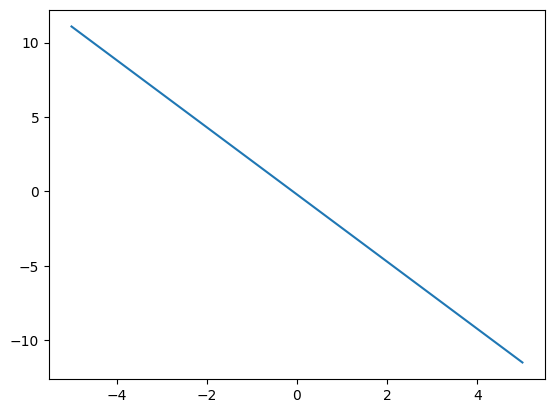

In [7]:
fig, ax = plt.subplots()
ax.plot(x, rng.multivariate_normal(np.zeros(N), Sigma));

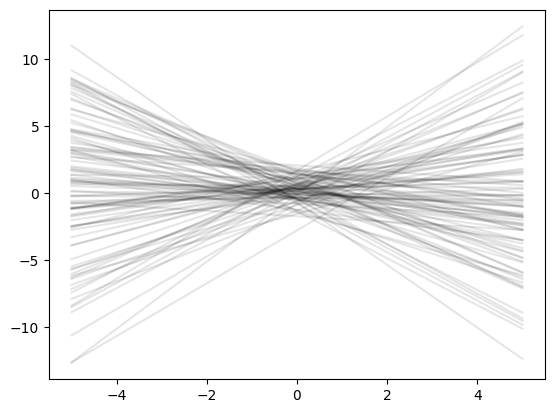

In [8]:
fig, ax = plt.subplots()

repeats = 100

for _ in range(repeats):
    ax.plot(x, rng.multivariate_normal(np.zeros(N), Sigma), alpha=0.1, c='k')

In [9]:
Sigma = np.zeros((N, N))
for i, t in enumerate(x):
    for j, tp in enumerate(x):
        Sigma[i, j] = squared_exponential_kernel(t, tp, sigma=1, l=1)

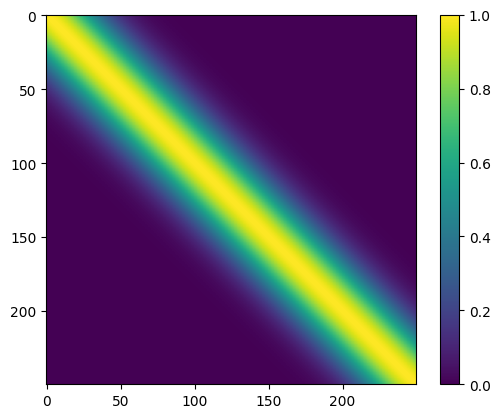

In [10]:
fig, ax = plt.subplots()
ax.set_aspect('equal')

ax.imshow(Sigma)
cbar = ax.figure.colorbar(ax.imshow(Sigma), ax=ax, cmap='viridis', )

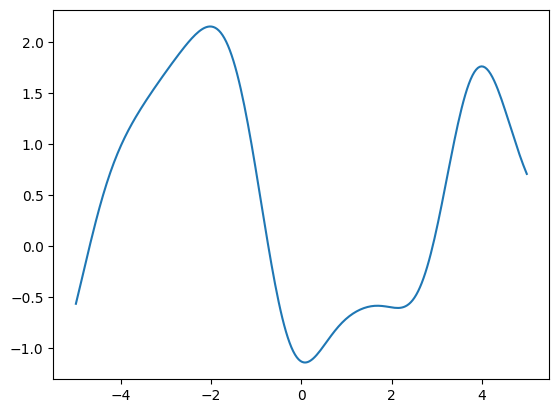

In [11]:
fig, ax = plt.subplots()
ax.plot(x, rng.multivariate_normal(np.zeros(N), Sigma));

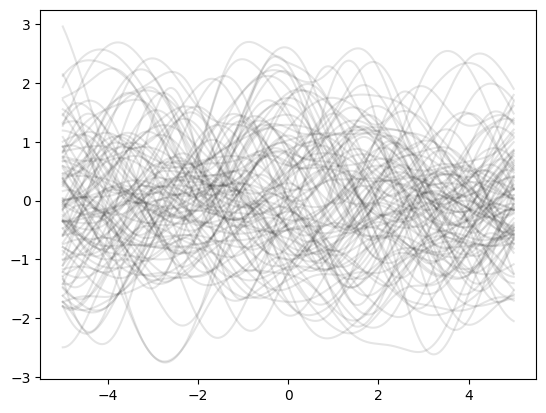

In [12]:
fig, ax = plt.subplots()

repeats = 100

for _ in range(repeats):
    ax.plot(x, rng.multivariate_normal(np.zeros(N), Sigma), alpha=0.1, c='k')

In [13]:
# Lets say we want the function to pass through (-2,2) and (3,-1). I think we
# append -2 and 3 to the array of x values and get a new covariance matrix...

training_x = np.array([-2, 3])
training_y = np.array([2, -1])

training_dim = len(training_x)

xp = np.append(training_x, x)

In [14]:
# what if I want a non-zero mean?
mu = 4

Sigma = np.zeros((N + training_dim, N + training_dim))

for i, t in enumerate(xp):
    for j, tp in enumerate(xp):
        Sigma[i, j] = squared_exponential_kernel(t, tp, sigma=1, l=2)

In [15]:
# Then we need to condition this thing, and in the process make it dimenion N
# again.

sigma_XX = Sigma[training_dim:, training_dim:]
sigma_YY = Sigma[:training_dim, :training_dim]

sigma_XY = Sigma[training_dim:, :training_dim]
sigma_YX = Sigma[:training_dim, training_dim:]

sigma_YY_inv = np.linalg.inv(sigma_YY)

mup = mu + sigma_XY @ sigma_YY_inv @ (training_y - mu)
Sigmap = sigma_XX - sigma_XY @ sigma_YY_inv @ sigma_YX

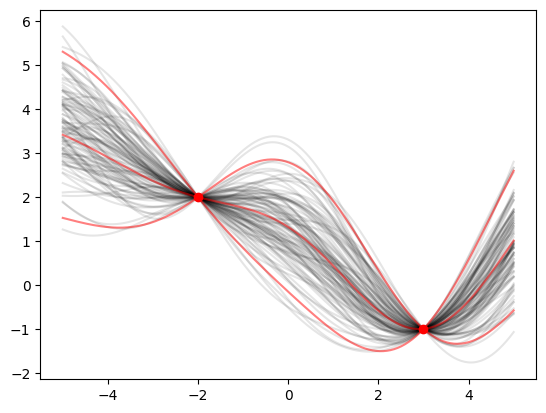

In [16]:
fig, ax = plt.subplots()

repeats = 100

for _ in range(repeats):
    ax.plot(x, rng.multivariate_normal(mup, Sigmap), alpha=0.1, c='k')

for x_train, y_train in zip(training_x, training_y):
    ax.scatter(x_train, y_train, c='r', zorder=10)

ax.plot(x, mup, c='r', zorder=10, alpha=0.5)
ax.plot(x, mup + 2*np.sqrt(np.diag(Sigmap)), c='r', zorder=10, alpha=0.5)
ax.plot(x, mup - 2*np.sqrt(np.diag(Sigmap)), c='r', zorder=10, alpha=0.5)

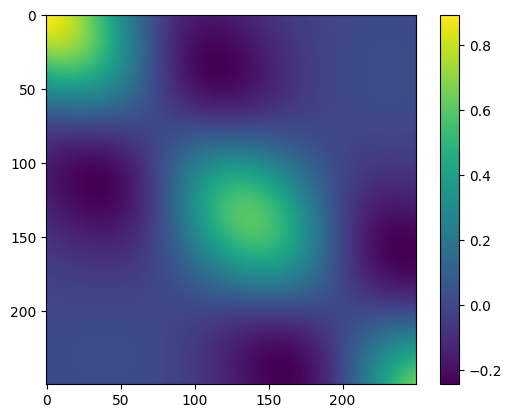

In [17]:
fig, ax = plt.subplots()
ax.set_aspect('equal')

ax.imshow(Sigmap)
cbar = ax.figure.colorbar(ax.imshow(Sigmap), ax=ax, cmap='viridis', )

In [18]:
# Add an uncertainty to the training data
psi = 0.05

sigma_YY = Sigma[:training_dim, :training_dim] + psi*np.eye(training_dim)

sigma_YY_inv = np.linalg.inv(sigma_YY)

mup = mu + sigma_XY @ sigma_YY_inv @ (training_y - mu)
Sigmap = sigma_XX - sigma_XY @ sigma_YY_inv @ sigma_YX

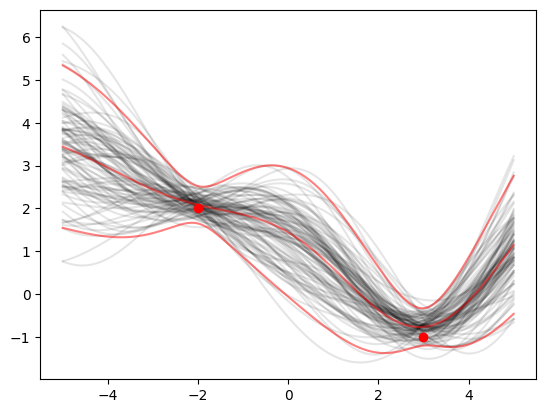

In [19]:
fig, ax = plt.subplots()

repeats = 100

for _ in range(repeats):
    ax.plot(x, rng.multivariate_normal(mup, Sigmap), alpha=0.1, c='k')

for x_train, y_train in zip(training_x, training_y):
    ax.scatter(x_train, y_train, c='r', zorder=10)

ax.plot(x, mup, c='r', zorder=10, alpha=0.5)
ax.plot(x, mup + 2*np.sqrt(np.diag(Sigmap)), c='r', zorder=10, alpha=0.5)
_ = ax.plot(x, mup - 2*np.sqrt(np.diag(Sigmap)), c='r', zorder=10, alpha=0.5)